In [1]:
import github_fetching as fetcher
import data_cleaning as cleaner
import sentiment_analysis as analyzer
import visualization as visualizer
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame

In [2]:
xz_folder = 'tukaani-project_xz/'

In [3]:
issue_pr_location = fetcher.fetch_issues_pr(folder_location = xz_folder)

Fetching Issues and PRs for tukaani-project/xz

Total 45 issue fetched

Total 40 pr fetched



In [4]:
cleaner.clean_thread(issue_pr_location)

Data Cleaning in Progress

Total 85 files cleaned



In [5]:
contribution_df = cleaner.calculate_author_contributions()
print(contribution_df.describe())
contribution_df

              count
count    178.000000
mean     371.915730
std     1452.190891
min        1.000000
25%       20.000000
50%       65.000000
75%      226.000000
max    14968.000000


,from,count
10,Larhzu,14968
41,JiaT75,11517
149,hansjans162,2714
168,skosukhin,2614
75,abcfy2,1870
...,...,...
121,Kamillaova,1
143,vtorri,1
141,AlejandroBarreda,1
131,CaptainFallaway,1


In [6]:
post_sentiment_results, user_interactions = analyzer.sentence_sentiment_analysis()


Running sentence-level sentiment analysis...
Sentence-level sentiment analysis done on 85 posts.

Now cleaning user interactions...
Done cleaning for user interactions
Now fetching GitHub usernames
Done GitHub username fetching
Cleaned user interactions saved.

Now constructing individual conversations
Skipping file Luis_Carilla_Ternero_to_Ari_Archer_(migrated_to_https://git.ari.lt/ari).csv due to error: Cannot save file into a non-existent directory: 'tukaani-project_xz\individual_conversations\Luis_Carilla_Ternero_to_Ari_Archer_(migrated_to_https:\git.ari.lt'
Skipping file Ari_Archer_(migrated_to_https://git.ari.lt/ari)_to_Luis_Carilla_Ternero.csv due to error: Cannot save file into a non-existent directory: 'tukaani-project_xz\individual_conversations\Ari_Archer_(migrated_to_https:\git.ari.lt'
Skipping file Ari_Archer_(migrated_to_https://git.ari.lt/ari)_to_Tuukka_Rouhiainen.csv due to error: Cannot save file into a non-existent directory: 'tukaani-project_xz\individual_conversation

In [7]:
user_interactions = pd.DataFrame(user_interactions)
graph_path = visualizer.generate_network(xz_folder, user_interactions, 'network_graph.html', 1)

Network saved to tukaani-project_xz/network_graph.html


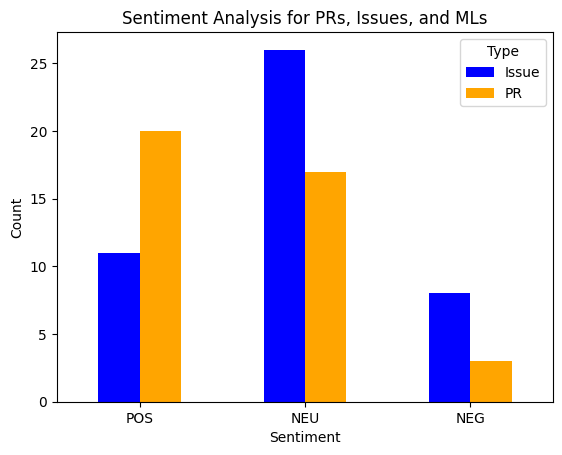

In [8]:
visualizer.post_analysis_visualization(post_sentiment_results)

In [9]:
visualizer.show_graph(graph_path)

In [10]:
commit_df = fetcher.fetch_commit_info(folder_location = xz_folder)
top_committers = fetcher.get_top_committers(commit_df)

Filtered commits saved to tukaani-project_xz/commits_info.csv


In [11]:
top_committers

,author_name,commit_count
21,Lasse Collin,865
17,Jia Tan,450
26,Sam James,14
22,Maksym Vatsyk,5
13,Hans Jansen,5
19,Kelvin Lee,5
18,Julien Marrec,3
11,Gabriela Gutierrez,3
5,Bjarni Ingi Gislason,3
20,Kian-Meng Ang,2


In [12]:
sentiment_df = analyzer.track_sentiment_given_and_received(user_interaction_df=user_interactions)

In [13]:
threat_df = analyzer.identify_threat(sentiment_df, top_committers)

In [14]:
threat_df

,user,sentiment_received,sentiment_given,commit_count
6,Sam James,-0.142805,-0.113311,14
2,Jia Tan,0.106795,0.437958,450
5,Lasse Collin,0.173319,0.009004,865
3,Kelvin Lee,0.303849,0.159459,5
4,Kian-Meng Ang,0.335396,0.291878,2


In [15]:
sentiment_df = sentiment_df[['user', 'sentiment_received', 'sentiment_given']]

In [16]:
sentiment_df

,user,sentiment_received,sentiment_given
0,57464bb4ebd6c0,-0.125374,0.000000
1,81800000,0.713518,0.000000
2,83c00000,0.713518,0.000000
3,Abdurrahim Cakar,-0.069116,0.000000
4,Aeterne Satiatus,-0.071130,-0.262508
...,...,...,...
78,vfazio2,-0.131167,0.000000
79,xodiumluma,-0.202941,0.580213
80,ნიკა,0.288961,0.265164
81,めら,0.078762,0.000000


In [17]:
top_committers

,author_name,commit_count
21,Lasse Collin,865
17,Jia Tan,450
26,Sam James,14
22,Maksym Vatsyk,5
13,Hans Jansen,5
19,Kelvin Lee,5
18,Julien Marrec,3
11,Gabriela Gutierrez,3
5,Bjarni Ingi Gislason,3
20,Kian-Meng Ang,2


In [18]:
post_sentiment_results

,name,type,sentiment,sentiment_score
0,issue_102.csv,Issue,NEG,-0.421401
1,issue_103.csv,Issue,NEU,0.040376
2,issue_104.csv,Issue,NEU,-0.056704
3,issue_105.csv,Issue,POS,0.213785
4,issue_107.csv,Issue,NEG,-0.252458
...,...,...,...,...
80,pr_90.csv,PR,POS,0.284361
81,pr_91.csv,PR,NEG,-0.264220
82,pr_93.csv,PR,NEU,-0.017419
83,pr_95.csv,PR,NEU,-0.143876
